<a href="https://colab.research.google.com/github/roscibely/Huawei-HCIA/blob/main/Machine_Learning_Overview_Experiment_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Boston House Price Forecast

## 1.1 Introduction




### 1.1.1 About this Experiment

The development in this experiment is based on **ModelArts**. For details about how to set up the environment, see the **HCIA-AI V3.0 Experiment Environment Setup Guide**. The sample size of the dataset used in this case is small, and the data comes from the open source **Boston house price data** provided by **scikit-learn**. The Boston House Price Forecast project is a simple **regression model**, through which you can learn some basic usage of the machine learning library sklearn and some basic data processing methods

### 1.1.2 Objectives

Upon completion of this task, you will be able to:
- Use the Boston house price data set that is open to the Internet as the model input data.
- Build, train, and evaluate machine learning models.
- Understand the overall process of building a machine learning model.
- Master the application of machine learning model training, grid search, and evaluation indicators.
- Master the application of related APIs


### 1.1.3 Datasets and Frameworks Used for the Experiment

This case is based on the Boston dataset, which contains **13 features** and **506 data records**. Each data record contains detailed information about the house and its surroundings. Specifically, it includes urban crime rate, nitric oxide concentration, average rooms in a house, weighted distance to the downtown area and average house price. The details are as follows:

- CRIM: urban per capita crime rate
- ZN: proportion of residential land exceeds 25,000 square feet
- INDUS: proportion of non-retail commercial land in a town
- CHAS: Charles river empty variable (1 indicates that the boundary is a river; otherwise, the value is 0)
- NOX: Nitric oxide concentration
- RM: average number of rooms in a house
- AGE: proportion of private houses completed before 1940
- DIS: weighted distance to the five central regions of Boston
- RAD: proximity index of a radial highway
- TAX: full value property tax rate of \$10,000
- PTRATIO: proportion of teachers and students in urban areas
- target: average price of private houses, unit: \$1,000

Framework: **Sklearn**, which provides Boston house price data, data set segmentation, standardization, and evaluation functions, and integrates various common machine learning algorithms. In addition, **XGboost** is used, which is an optimized version of GBDT in the integration algorithm.


## 1.2 Experiment Code

### 1.2.1 Introducing dependencies

In [ ]:
#Prevent unnecessary warnings.
import warnings
warnings.filterwarnings("ignore")

#Introduce the basic package of data science.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

##Set attributes to prevent garbled characters in Chinese.
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

#Introduce machine learning, preprocessing, model selection, and evaluation indicators.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

#Import the Boston dataset used this time.
from sklearn.datasets import load_boston

#Introduce algorithms.
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
#Compared with SVC, it is the regression form of SVM.
from sklearn.svm import SVR
#Integrate algorithms.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### 1.2.2 Loading the Data Set, Viewing Data Attributes, and Visualizing the Data

In [ ]:
#Load the Boston house price data set.
boston = load_boston()

#x features, and y labels.
x = boston.data
y = boston.target

#Display related attributes.
print('Feature column name')
print(boston.feature_names)
print("Sample data volume: %d, number of features: %d"% x.shape)
print("Target sample data volume: %d"% y.shape[0])


Feature column name
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Sample data volume: 506, number of features: 13
Target sample data volume: 506


In [ ]:
#Convert to the dataframe format.
x = pd.DataFrame(boston.data, columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


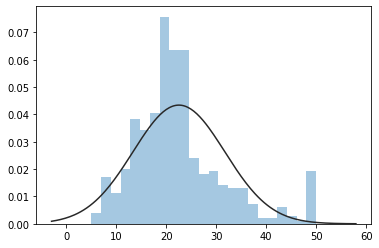

In [ ]:
#Visualize label distribution.
sns.distplot(tuple(y), kde=False, fit=st.norm)
plt.show()

### 1.2.3 Spliting and Pre-processing the Data Set

In [ ]:
#Segment the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)
#Standardize the data set.
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
x_train[0:100]

array([[-0.35703125, -0.49503678, -0.15692398, ..., -0.01188637,
         0.42050162, -0.29153411],
       [-0.39135992, -0.49503678, -0.02431196, ...,  0.35398749,
         0.37314392, -0.97290358],
       [ 0.5001037 , -0.49503678,  1.03804143, ...,  0.81132983,
         0.4391143 ,  1.18523567],
       ...,
       [-0.34697089, -0.49503678, -0.15692398, ..., -0.01188637,
         0.4391143 , -1.11086682],
       [-0.39762221,  2.80452783, -0.87827504, ...,  0.35398749,
         0.4391143 , -1.28120919],
       [-0.38331362,  0.41234349, -0.74566303, ...,  0.30825326,
         0.19472652, -0.40978832]])

### 1.2.4 Using Various Regression  Models to Model Data Sets

In [ ]:
#Set the model name.
names = ['LinerRegression',
       'Ridge',
       'Lasso',
       'Random Forrest',
       'GBDT',
       'Support Vector Regression',
       'ElasticNet',
       'XgBoost']

#Define the model.
# cv is the cross-validation idea here.
models = [LinearRegression(),
         RidgeCV(alphas=(0.001,0.1,1),cv=3),
         LassoCV(alphas=(0.001,0.1,1),cv=5),
         RandomForestRegressor(n_estimators=10),
         GradientBoostingRegressor(n_estimators=30),
         SVR(),
         ElasticNet(alpha=0.001,max_iter=10000),
         XGBRegressor()]
# Output the R2 scores of all regression models.

#Define the R2 scoring function.
def R2(model,x_train, x_test, y_train, y_test):

        model_fitted = model.fit(x_train,y_train)
        y_pred = model_fitted.predict(x_test)
        score = r2_score(y_test, y_pred)
        return score

#Traverse all models to score.
for name,model in zip(names,models):
        score = R2(model,x_train, x_test, y_train, y_test)
        print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))


LinerRegression: 0.564115, 0.0000
Ridge: 0.563673, 0.0000
Lasso: 0.564049, 0.0000
Random Forrest: 0.657464, 0.0000
GBDT: 0.730554, 0.0000
Support Vector Regression: 0.517260, 0.0000
ElasticNet: 0.563992, 0.0000
[23:17:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XgBoost: 0.761123, 0.0000


### 1.2.5 Adjusting Hyperparameters by Grid Search

In [ ]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['linear', 'rbf'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
##Obtain optimal parameters.
print("Optimal parameter list:", model.best_params_)
print("Optimal model:", model.best_estimator_)
print("Optimal R2 value:", model.best_score_)

Optimal parameter list: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Optimal model: SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Optimal R2 value: 0.7965173649188232


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


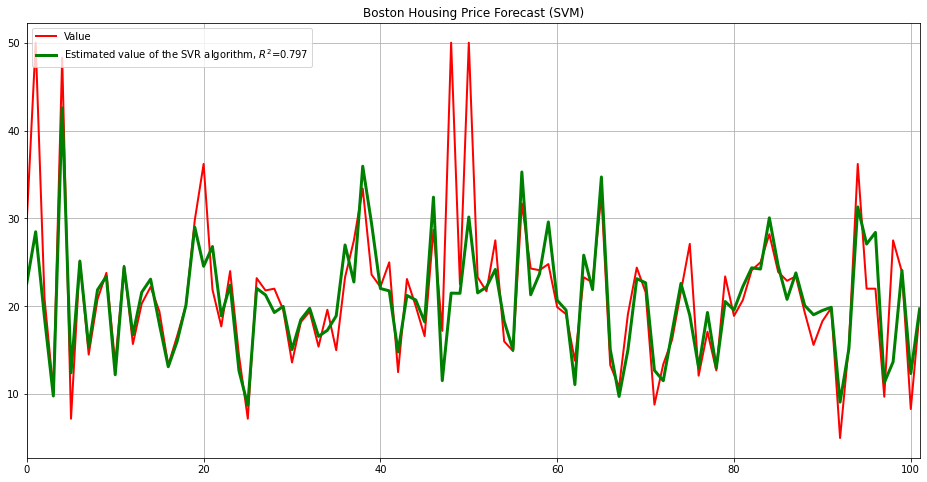

In [ ]:
##Perform visualization.
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

#Set the canvas.
plt.figure(figsize=(16,8), facecolor='w')
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'r-', lw=2, label=u'Value')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'g-', lw = 3, label=u'Estimated value of the SVR algorithm, $R^2$=%.3f' % (model.best_score_))

#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Boston Housing Price Forecast (SVM)")
plt.xlim(0, 101)
plt.show()


## 1.3 Summary

This chapter describes how to build a Boston house price regression model based on sklearn, including importing, segmenting, and standardizing data, defining models, and setting hyperparameters, and provides trainees with a basic concept of machine learning model building.

